# Exploring Dandiset 000617: Allen Institute Openscope - Sequence Learning Project

**DISCLAIMER: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results presented here.**

## Overview

This notebook explores the "Allen Institute Openscope - Sequence Learning Project" Dandiset, which contains two-photon calcium imaging data from mice viewing sequences of natural movie clips. The dataset is available on the DANDI Archive at [https://dandiarchive.org/dandiset/000617/0.250312.0130](https://dandiarchive.org/dandiset/000617/0.250312.0130).

In this experiment, head-fixed mice passively viewed sequences of three different natural movie clips (labeled 'A', 'B', 'C'), each lasting 2 seconds, along with a 2-second gray screen (labeled 'X'). The experimental design includes:

1. A baseline recording session with random presentation of movie clips
2. Three recording sessions where the clips are presented in a repeating sequence (ABCABC...)
3. A final session with random presentation to test changes in neural responses

The experiment used 2-photon microscopy with multiple simultaneously recorded fields-of-view, including both layer 2/3 and layer 4 as well as from multiple cortical areas (V1, LM, AM, and PM).

## Contents

This notebook will cover:

1. Setting up connections to the DANDI Archive
2. Loading metadata from the Dandiset
3. Exploring the structure of an NWB file
4. Visualizing calcium imaging data
5. Examining stimulus-evoked responses
6. Analyzing running behavior data
7. Exploring spatial properties of cell responses

## Required Packages

The following packages are used in this notebook:

In [1]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
from itertools import islice
import seaborn as sns
from typing import List

# DANDI and NWB specific libraries
from dandi.dandiapi import DandiAPIClient
import h5py
import remfile
import pynwb

# Set plotting defaults
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 8)

## Loading the Dandiset from DANDI Archive

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000617", "0.250312.0130")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'No description available')[:500]}...")
print(f"Keywords: {', '.join(metadata.get('keywords', []))}")

Dandiset name: Allen Institute Openscope - Sequence Learning Project
Dandiset URL: https://dandiarchive.org/dandiset/000617/0.250312.0130
Dandiset description: Adaptive and coordinated behavior requires that an animal be able to make predictions about the near and even far future. This intuition that some neural computations should be ‘predictive’ in their character has a long history, starting with ideas about how the receptive field structure of retinal ganglion cells relate to the statistics of natural visual scenes. Ideas about predictive computation have been most influential in thinking about the function of the neocortex. Here, the relatively st...
Keywords: L2/3, L4, two-photon calcium imaging, prediction, pyramidal neurons, somata, neocortex, predictive coding, predictive processing, sequence learning, movies


## Exploring Assets in the Dandiset

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (Size: {asset.size / (1024**2):.2f} MB)")


First 5 assets:
- sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb (Size: 20185.73 MB)
- sub-684475/sub-684475_ses-1294084428-acq-1294179943-raw-movies_ophys.nwb (Size: 20181.10 MB)
- sub-684475/sub-684475_ses-1293785946-acq-1293914859-raw-movies_ophys.nwb (Size: 20193.82 MB)
- sub-684475/sub-684475_ses-1294084428-acq-1294179942-raw-movies_ophys.nwb (Size: 20177.53 MB)
- sub-684475/sub-684475_ses-1294259213-acq-1294370666-raw-movies_ophys.nwb (Size: 20198.45 MB)


## Loading an NWB File

For this notebook, we'll examine one of the NWB files that contains processed data from a calcium imaging session. Specifically, we'll work with a file from the subject 677038.

In [4]:
# URL for the NWB file we'll analyze
asset_url = "https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/"
print(f"Loading NWB file: {asset_url}")

# Open the file using remfile to stream it from DANDI
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic file information
print("\nNWB File Information:")
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experiment Description: {nwb.experiment_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject Age: {nwb.subject.age}")
print(f"Subject Sex: {nwb.subject.sex}")
print(f"Subject Species: {nwb.subject.species}")
print(f"Subject Genotype: {nwb.subject.genotype}")

Loading NWB file: https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/



NWB File Information:
Session Description: Ophys Session
Identifier: 1280384858
Session Start Time: 2023-06-30 16:04:51.055000+00:00
Experiment Description: ophys session
Subject ID: 677038
Subject Age: P92.0D
Subject Sex: F
Subject Species: Mus musculus
Subject Genotype: Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt


This NWB file can also be viewed in [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/&dandisetId=000617&dandisetVersion=0.250312.0130), which provides a user-friendly interface for exploring the data.

## Exploring the NWB File Structure

Let's explore the structure of the NWB file to understand the available data.

In [5]:
# Check what's in the file
print("NWB File Content Summary:")
print("\nAcquisition data:")
for name in nwb.acquisition:
    print(f"- {name}")

print("\nStimulus templates:")
for name in nwb.stimulus_template:
    print(f"- {name}")

print("\nProcessing modules:")
for module_name in nwb.processing:
    print(f"- {module_name}")
    module = nwb.processing[module_name]
    print(f"  Data interfaces:")
    for interface_name in module.data_interfaces:
        print(f"  - {interface_name}")

print("\nIntervals:")
for interval_name in nwb.intervals:
    print(f"- {interval_name}")

NWB File Content Summary:

Acquisition data:
- v_in
- v_sig

Stimulus templates:
- gray
- movie_clip_A
- movie_clip_B
- movie_clip_C

Processing modules:
- ophys
  Data interfaces:
  - corrected_fluorescence
  - dff
  - event_detection
  - image_segmentation
  - images
  - neuropil_trace
  - ophys_motion_correction_x
  - ophys_motion_correction_y
- running
  Data interfaces:
  - dx
  - speed
  - speed_unfiltered
- stimulus
  Data interfaces:
  - timestamps
- stimulus_ophys
  Data interfaces:
  - timestamps

Intervals:
- gray_presentations
- movie_clip_A_presentations
- movie_clip_B_presentations
- movie_clip_C_presentations


### Cell ROI Information

Let's examine the regions of interest (ROIs) in the dataset. These correspond to the cells that were recorded during imaging.

In [6]:
# Access the plane segmentation that contains cell ROI information
ophys = nwb.processing["ophys"]
image_segmentation = ophys.data_interfaces["image_segmentation"]
plane_segmentations = image_segmentation.plane_segmentations
cell_specimen_table = plane_segmentations["cell_specimen_table"]

# Convert to a pandas DataFrame for easier viewing
roi_df = cell_specimen_table.to_dataframe()

# Display summary information
print(f"Number of cells: {len(roi_df)}")
print("\nROI table columns:")
for col in roi_df.columns:
    print(f"- {col}")

# Show the first few rows
print("\nFirst 5 cells:")
display(roi_df.head())

# Examine which cells are valid ROIs
valid_cells = roi_df[roi_df['valid_roi'] == 1]
print(f"\nNumber of valid cells: {len(valid_cells)} ({len(valid_cells)/len(roi_df)*100:.1f}% of total)")

Number of cells: 121

ROI table columns:
- cell_specimen_id
- height
- mask_image_plane
- max_correction_down
- max_correction_left
- max_correction_right
- max_correction_up
- valid_roi
- width
- x
- y
- image_mask

First 5 cells:


cell_specimen_id  height  mask_image_plane  max_correction_down  \
id                                                                            
1285902696                -1      22                 1                  4.0   
1285902717                -1      18                 1                  4.0   
1285902742                -1      19                 1                  4.0   
1285902805                -1      22                 0                  4.0   
1285902819                -1      20                 0                  4.0   

            max_correction_left  max_correction_right  max_correction_up  \
id                                                                         
1285902696                 18.0                   5.0               23.0   
1285902717                 18.0                   5.0               23.0   
1285902742                 18.0                   5.0               23.0   
1285902805                 18.0                   5.0               23.0   
1285902819                 18.0                   5.0               23.0   

            valid_roi  width    x    y  \
id                                       
1285902696       True     23   47   47   
1285902717       True     18  282   32   
1285902742       True     21  420   35   
1285902805       True     23  348  196   
1285902819       True     19  447  197   

                                                   image_mask  
id                                                             
1285902696  [[False, False, False, False, False, False, Fa...  
1285902717  [[False, False, False, False, False, False, Fa...  
1285902742  [[False, False, False, False, False, False, Fa...  
1285902805  [[False, False, False, False, False, False, Fa...  
1285902819  [[False, False, False, False, False, False, Fa...


Number of valid cells: 121 (100.0% of total)


### Imaging Plane Information

Now let's look at the imaging plane information to understand more about the recording setup.

In [7]:
# Access the imaging plane information
imaging_plane = cell_specimen_table.imaging_plane

print("Imaging Plane Information:")
print(f"Description: {imaging_plane.description}")
print(f"Location: {imaging_plane.location}")
print(f"Indicator: {imaging_plane.indicator}")
print(f"Imaging Rate: {imaging_plane.imaging_rate} Hz")
print(f"Excitation Lambda: {imaging_plane.excitation_lambda} nm")
print(f"Device Description: {imaging_plane.device.description}")

Imaging Plane Information:
Description: (512, 512) field of view in VISp at depth 175 um
Location: VISp
Indicator: GCaMP6f
Imaging Rate: 10.0 Hz
Excitation Lambda: 910.0 nm
Device Description: Allen Brain Observatory - Mesoscope 2P Rig


## Analyzing Calcium Imaging Data

Let's examine the calcium imaging fluorescence traces for some of the cells. We'll look at both the raw (corrected) fluorescence and the dF/F signals, which represent the normalized change in fluorescence over time.

In [8]:
# Access fluorescence traces
corrected_fluorescence = ophys.data_interfaces["corrected_fluorescence"]
raw_traces = corrected_fluorescence.roi_response_series["traces"]

# Access dF/F (delta F / F) traces
dff = ophys.data_interfaces["dff"]
dff_traces = dff.roi_response_series["traces"]

# Get timestamps - convert to numpy array
timestamps = raw_traces.timestamps[:]

# Get subset of data for plotting (first 3 minutes for 5 cells)
time_slice = slice(0, int(3 * 60 * imaging_plane.imaging_rate))  # 3 minutes of data
cell_slice = slice(0, 5)  # First 5 cells

time_subset = timestamps[time_slice]
raw_subset = raw_traces.data[time_slice, cell_slice]
dff_subset = dff_traces.data[time_slice, cell_slice]

print(f"Time range: {time_subset[0]:.2f}s - {time_subset[-1]:.2f}s")
print(f"Raw trace shape: {raw_subset.shape}")
print(f"DFF trace shape: {dff_subset.shape}")

Time range: 22.36s - 211.35s
Raw trace shape: (1800, 5)
DFF trace shape: (1800, 5)


Let's plot the raw fluorescence traces for these cells:

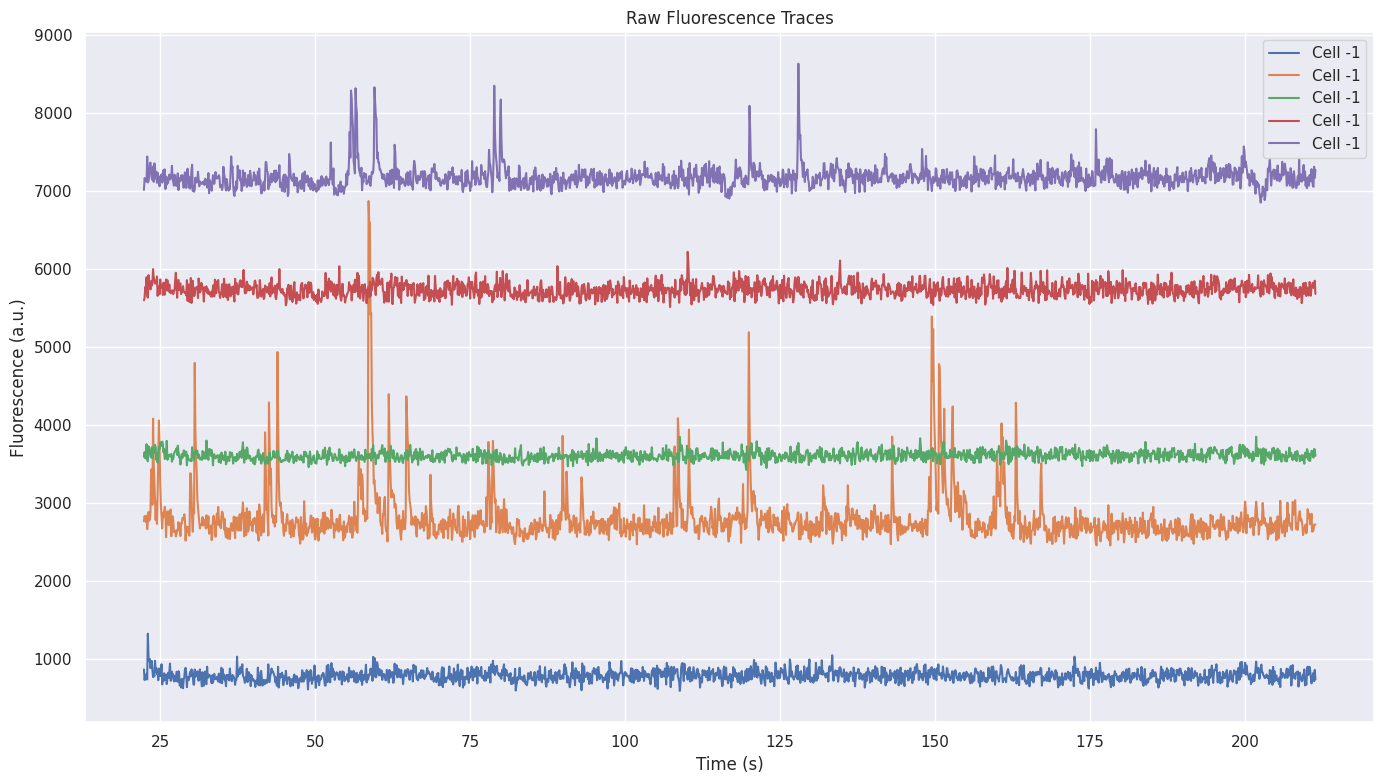

In [9]:
fig, ax = plt.subplots(figsize=(14, 8))

for i in range(raw_subset.shape[1]):
    # Get actual cell ID for better labeling
    cell_id = roi_df['cell_specimen_id'].iloc[i]
    
    # Offset traces for clearer visualization
    offset = i * np.max(raw_subset[:, 0]) * 1.2
    ax.plot(time_subset, raw_subset[:, i] + offset, label=f"Cell {cell_id}")
    
ax.set_xlabel('Time (s)')
ax.set_ylabel('Fluorescence (a.u.)')
ax.set_title('Raw Fluorescence Traces')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

Now let's plot the dF/F traces, which show the normalized change in fluorescence and are typically used to infer neural activity:

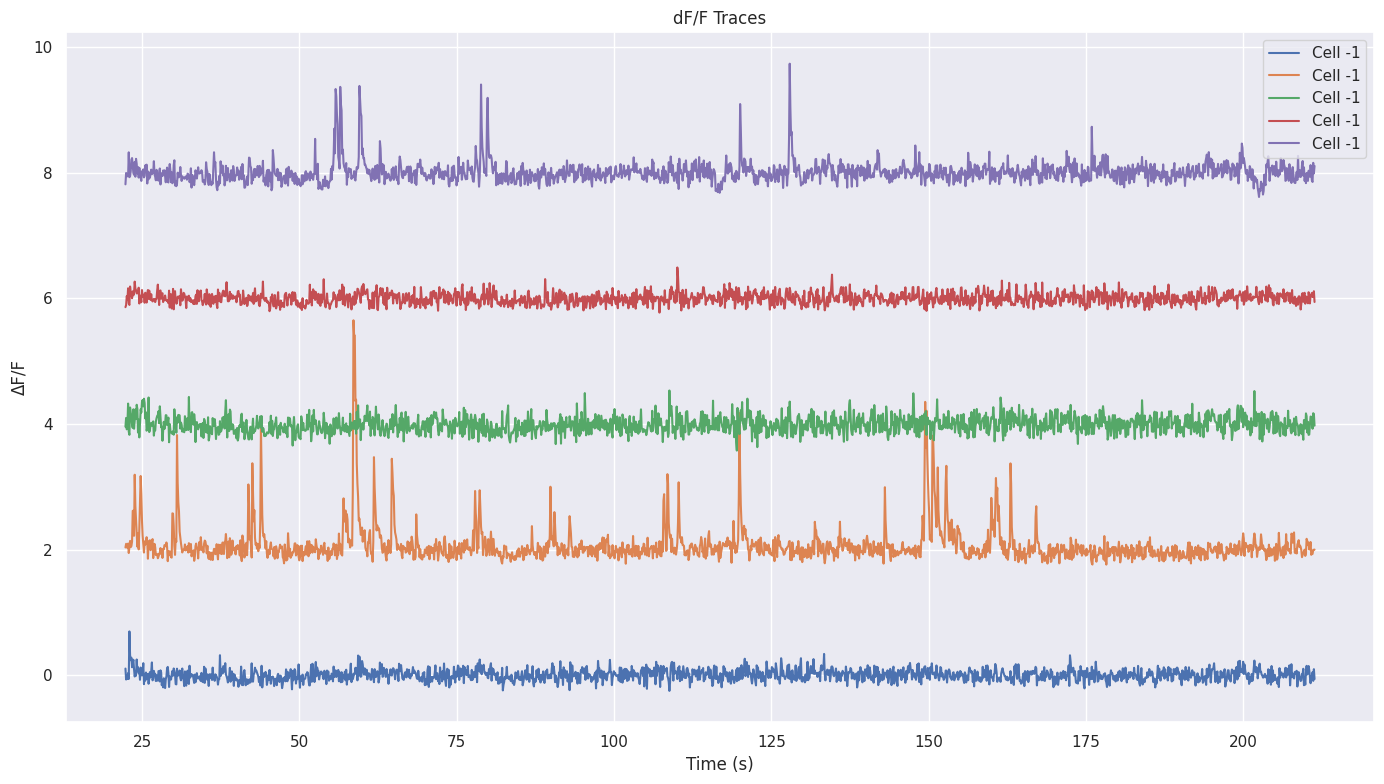

In [10]:
fig, ax = plt.subplots(figsize=(14, 8))

for i in range(dff_subset.shape[1]):
    # Get actual cell ID
    cell_id = roi_df['cell_specimen_id'].iloc[i]
    
    # Offset traces for clearer visualization
    offset = i * 2
    ax.plot(time_subset, dff_subset[:, i] + offset, label=f"Cell {cell_id}")
    
ax.set_xlabel('Time (s)')
ax.set_ylabel('ΔF/F')
ax.set_title('dF/F Traces')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Stimulus Information and Neural Responses

The experiment involved presenting different movie clips to the mouse. Let's examine the timing of these stimuli and how neurons responded to them.

In [11]:
# Get stimulus presentation intervals
gray_presentations = nwb.intervals["gray_presentations"]
movie_A_presentations = nwb.intervals["movie_clip_A_presentations"]
movie_B_presentations = nwb.intervals["movie_clip_B_presentations"]
movie_C_presentations = nwb.intervals["movie_clip_C_presentations"]

# Convert to dataframes
gray_df = gray_presentations.to_dataframe()
movie_A_df = movie_A_presentations.to_dataframe()
movie_B_df = movie_B_presentations.to_dataframe()
movie_C_df = movie_C_presentations.to_dataframe()

# Look at the first few stimulus presentations
print("Gray stimulus presentations:")
display(gray_df[['start_time', 'stop_time', 'stimulus_name']].head())

print("\nMovie A stimulus presentations:")
display(movie_A_df[['start_time', 'stop_time', 'stimulus_name']].head())

# Count the number of presentations of each type
print(f"\nNumber of gray presentations: {len(gray_df)}")
print(f"Number of movie A presentations: {len(movie_A_df)}")
print(f"Number of movie B presentations: {len(movie_B_df)}")
print(f"Number of movie C presentations: {len(movie_C_df)}")

Gray stimulus presentations:


start_time  stop_time stimulus_name
id                                     
0    34.918040  34.934720          gray
1    34.934720  34.951401          gray
2    34.951401  34.968082          gray
3    34.968082  34.984762          gray
4    34.984762  35.001443          gray


Movie A stimulus presentations:


start_time  stop_time stimulus_name
id                                     
0    22.908110  22.924791  movie_clip_A
1    22.924791  22.941472  movie_clip_A
2    22.941472  22.958153  movie_clip_A
3    22.958153  22.974834  movie_clip_A
4    22.974834  22.991515  movie_clip_A


Number of gray presentations: 63000
Number of movie A presentations: 63000
Number of movie B presentations: 63000
Number of movie C presentations: 63000


Let's look at the timing of stimulus presentations during a short segment of the recording:

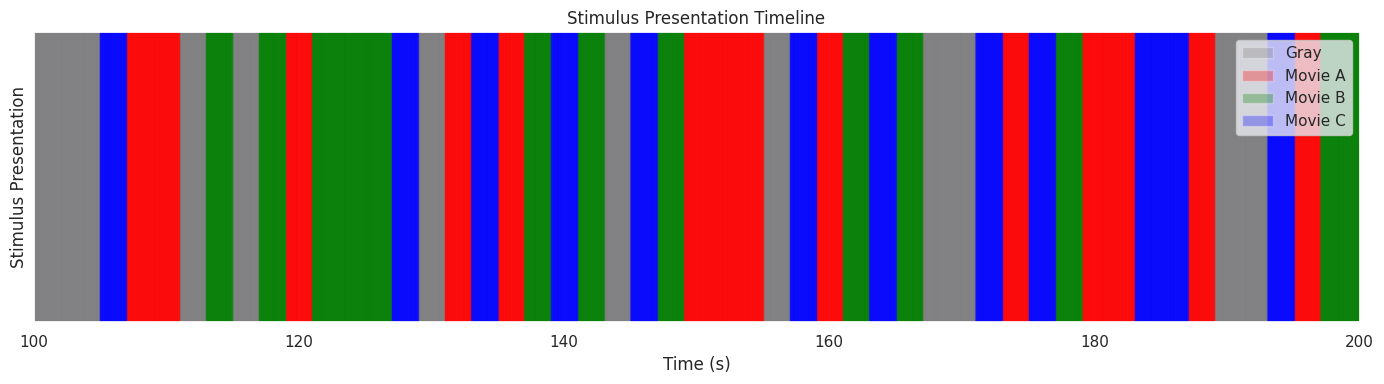

In [12]:
# Define a time window to analyze
start_time = 100  # seconds
end_time = 200  # seconds
time_window = (start_time, end_time)

# Filter stimulus presentations that fall within the time window
gray_window = gray_df[(gray_df['start_time'] >= start_time) & (gray_df['stop_time'] <= end_time)]
movie_A_window = movie_A_df[(movie_A_df['start_time'] >= start_time) & (movie_A_df['stop_time'] <= end_time)]
movie_B_window = movie_B_df[(movie_B_df['start_time'] >= start_time) & (movie_B_df['stop_time'] <= end_time)]
movie_C_window = movie_C_df[(movie_C_df['start_time'] >= start_time) & (movie_C_df['stop_time'] <= end_time)]

# Plot the timing of stimulus presentations
fig, ax = plt.subplots(figsize=(14, 4))

# Plot stimulus intervals as colored regions
for idx, row in gray_window.iterrows():
    ax.axvspan(row['start_time'], row['stop_time'], alpha=0.3, color='gray', label='_Gray')
    
for idx, row in movie_A_window.iterrows():
    ax.axvspan(row['start_time'], row['stop_time'], alpha=0.3, color='red', label='_Movie A')

for idx, row in movie_B_window.iterrows():
    ax.axvspan(row['start_time'], row['stop_time'], alpha=0.3, color='green', label='_Movie B')

for idx, row in movie_C_window.iterrows():
    ax.axvspan(row['start_time'], row['stop_time'], alpha=0.3, color='blue', label='_Movie C')

# Add legend with unique entries
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='gray', alpha=0.3, label='Gray'),
    Patch(facecolor='red', alpha=0.3, label='Movie A'),
    Patch(facecolor='green', alpha=0.3, label='Movie B'),
    Patch(facecolor='blue', alpha=0.3, label='Movie C')
]
ax.legend(handles=legend_elements, loc='upper right')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Stimulus Presentation')
ax.set_title('Stimulus Presentation Timeline')
ax.set_xlim(start_time, end_time)
ax.set_yticks([])
plt.tight_layout()
plt.show()

Now, let's look at the neural activity of a few cells during stimulus presentations:

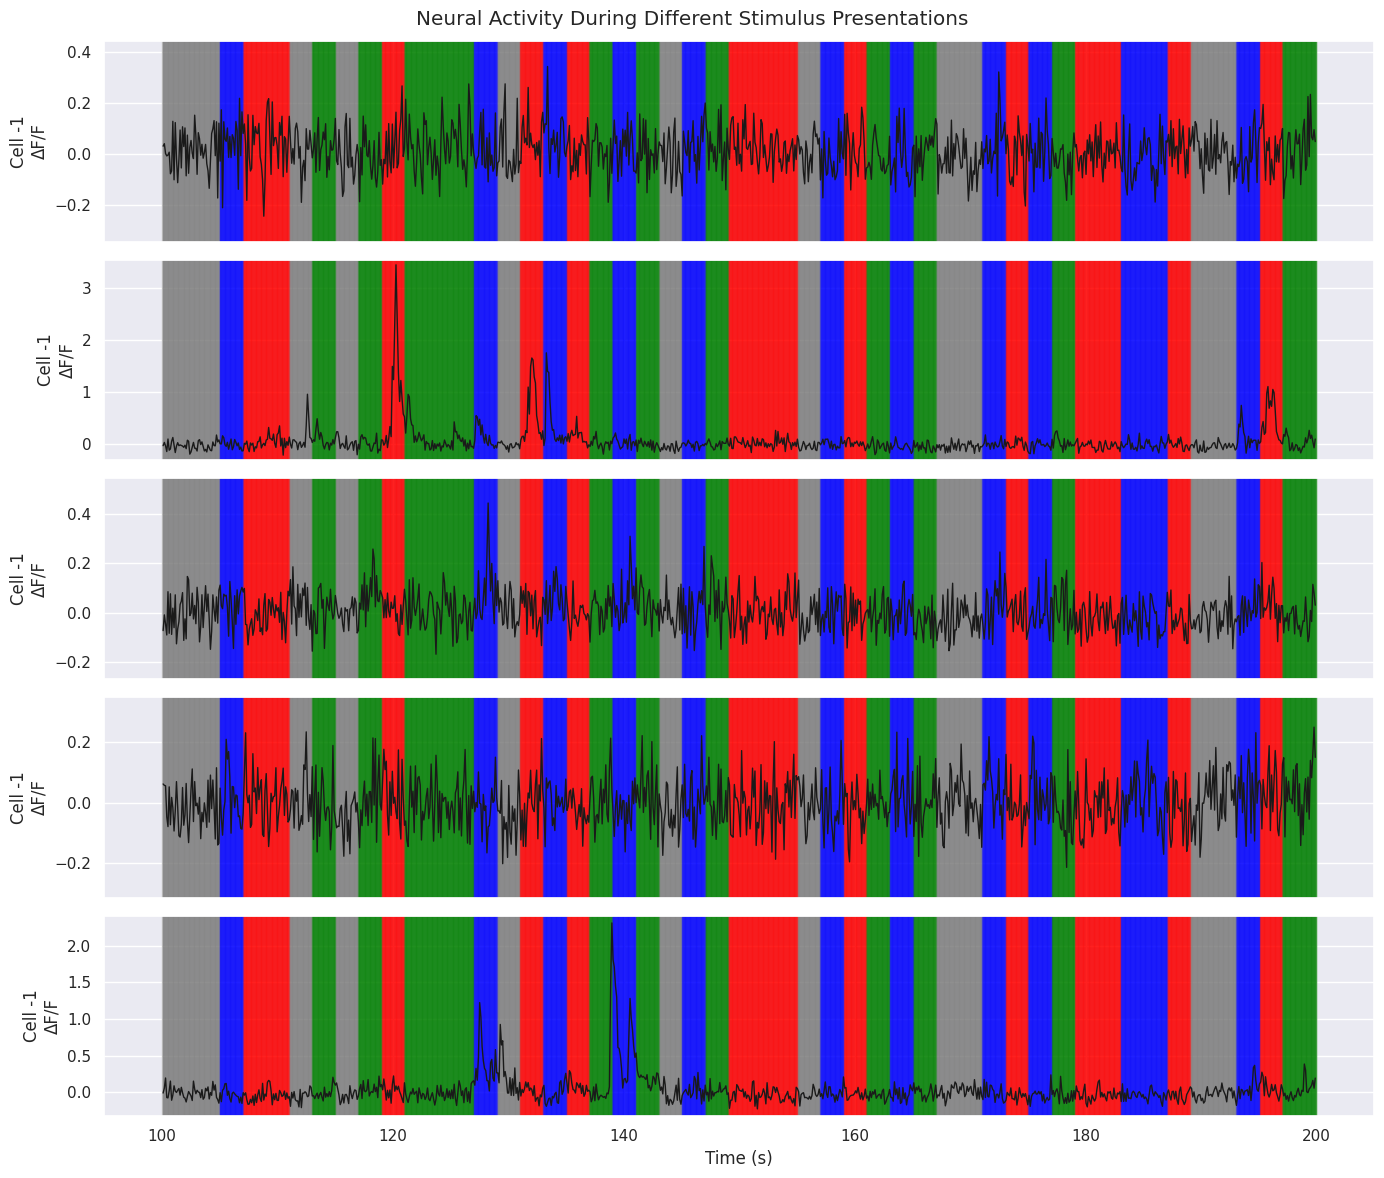

In [13]:
# Function to find overlapping time indices
def find_time_indices(timestamps_array, start_time, stop_time):
    return np.where((timestamps_array >= start_time) & (timestamps_array <= stop_time))[0]

# Select cells that show good responses
cell_indices = [0, 10, 20, 30, 40]  # Example cells to examine

# Convert timestamps to numpy array if not already
timestamps_array = timestamps

# Plot neural activity during stimulus presentations
fig, axs = plt.subplots(len(cell_indices), 1, figsize=(14, 12), sharex=True)

for i, cell_idx in enumerate(cell_indices):
    # Get cell ID for better labeling
    cell_id = roi_df['cell_specimen_id'].iloc[cell_idx]
    
    # Plot dF/F trace
    time_mask = (timestamps_array >= start_time) & (timestamps_array <= end_time)
    axs[i].plot(timestamps_array[time_mask], dff_traces.data[time_mask, cell_idx], 'k', lw=1)
    
    # Mark stimulus presentations
    # Gray
    for _, row in gray_window.iterrows():
        axs[i].axvspan(row['start_time'], row['stop_time'], alpha=0.2, color='gray')
    
    # Movie A
    for _, row in movie_A_window.iterrows():
        axs[i].axvspan(row['start_time'], row['stop_time'], alpha=0.2, color='red')
    
    # Movie B
    for _, row in movie_B_window.iterrows():
        axs[i].axvspan(row['start_time'], row['stop_time'], alpha=0.2, color='green')
    
    # Movie C
    for _, row in movie_C_window.iterrows():
        axs[i].axvspan(row['start_time'], row['stop_time'], alpha=0.2, color='blue')
    
    axs[i].set_ylabel(f'Cell {cell_id}\nΔF/F')
    axs[i].set_ylim(dff_traces.data[time_mask, cell_idx].min() - 0.1, 
                    dff_traces.data[time_mask, cell_idx].max() + 0.1)

axs[-1].set_xlabel('Time (s)')
fig.suptitle('Neural Activity During Different Stimulus Presentations')
plt.tight_layout()
plt.show()

## Stimulus-triggered Averaging

Let's analyze how cells respond to each type of stimulus by calculating the average response across all presentations.

In [14]:
# Function to extract response snippets
def extract_response_snippets(dff_data, timestamps_array, stim_df, pre_time=0.5, post_time=2.5):
    snippets = []
    for _, row in stim_df.iterrows():
        start_idx = find_time_indices(timestamps_array, row['start_time'] - pre_time, row['start_time'])[0]
        end_idx = find_time_indices(timestamps_array, row['stop_time'], row['stop_time'] + post_time)[-1]
        
        # Align to stimulus onset
        t = timestamps_array[start_idx:end_idx+1] - row['start_time']
        response = dff_data[start_idx:end_idx+1]
        
        snippets.append((t, response))
    
    return snippets

# Function to compute average response and resample to common timebase
def compute_average_response(snippets, n_points=100):
    # Find range of times
    min_time = min(s[0][0] for s in snippets)
    max_time = max(s[0][-1] for s in snippets)
    
    # Create common timebase
    common_time = np.linspace(min_time, max_time, n_points)
    
    # Resample each snippet to the common timebase
    resampled = []
    for t, response in snippets:
        resampled.append(np.interp(common_time, t, response))
    
    # Compute average and std
    avg_response = np.mean(resampled, axis=0)
    std_response = np.std(resampled, axis=0)
    
    return common_time, avg_response, std_response

Now let's compute the average responses for a few cells:

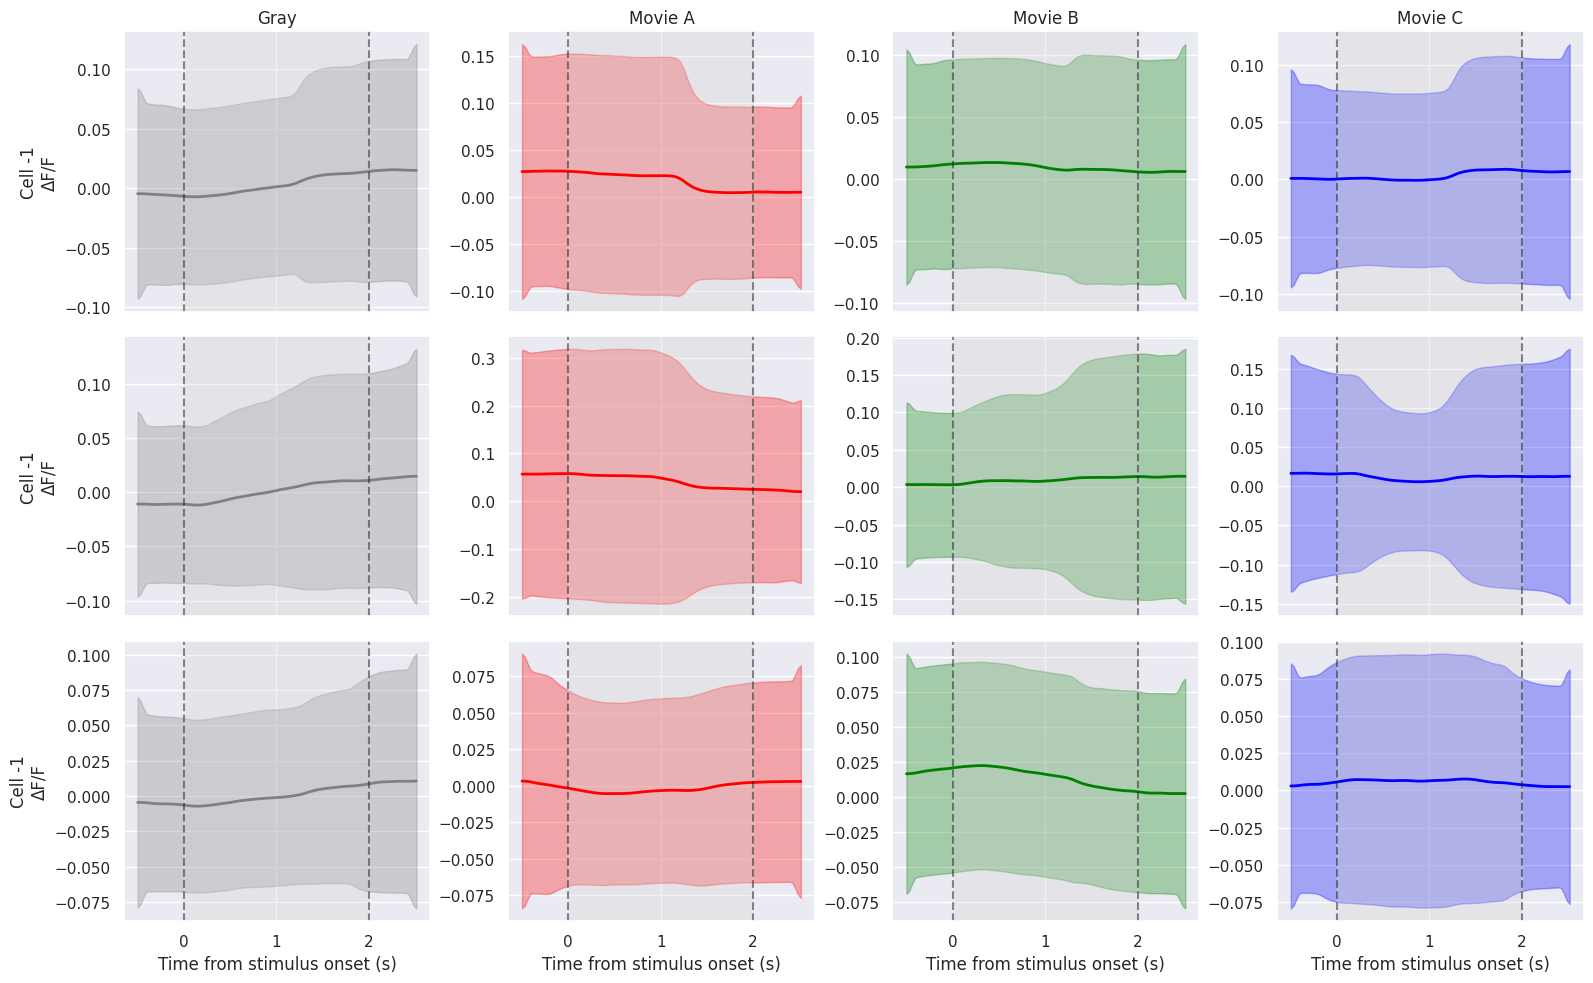

In [15]:
# Select a subset of cells for analysis
analyze_cells = cell_indices[:3]  # Use first 3 cells from our previous selection

# Set up plotting
fig, axs = plt.subplots(len(analyze_cells), 4, figsize=(16, 10), sharex='col')
stim_dfs = [gray_df, movie_A_df, movie_B_df, movie_C_df]
stim_names = ['Gray', 'Movie A', 'Movie B', 'Movie C']
colors = ['gray', 'red', 'green', 'blue']

for i, cell_idx in enumerate(analyze_cells):
    cell_id = roi_df['cell_specimen_id'].iloc[cell_idx]
    
    for j, (stim_df, stim_name, color) in enumerate(zip(stim_dfs, stim_names, colors)):
        # Extract snippet for this cell and stimulus
        snippets = extract_response_snippets(dff_traces.data[:, cell_idx], timestamps, stim_df)
        
        # Time and average responses
        common_time, avg_response, std_response = compute_average_response(snippets)
        
        # Plot
        axs[i, j].plot(common_time, avg_response, color=color, lw=2)
        axs[i, j].fill_between(common_time, 
                               avg_response - std_response, 
                               avg_response + std_response, 
                               color=color, alpha=0.3)
        
        # Mark stimulus duration
        axs[i, j].axvspan(0, 2, color='lightgray', alpha=0.3)
        axs[i, j].axvline(0, color='k', linestyle='--', alpha=0.5)
        axs[i, j].axvline(2, color='k', linestyle='--', alpha=0.5)
        
        # Labels
        if i == 0:
            axs[i, j].set_title(stim_name)
        if i == len(analyze_cells) - 1:
            axs[i, j].set_xlabel('Time from stimulus onset (s)')
        if j == 0:
            axs[i, j].set_ylabel(f'Cell {cell_id}\nΔF/F')

plt.tight_layout()
plt.show()

## Analyzing Running Behavior

The mice were head-fixed but able to run on a wheel. Let's examine the running behavior and see if there's any relationship with neural activity.

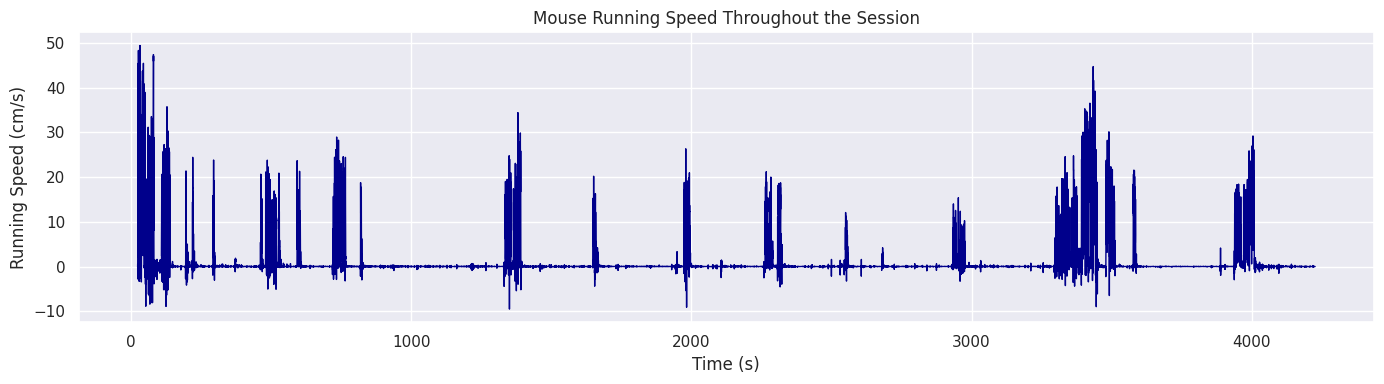

In [16]:
# Access running speed data
running = nwb.processing["running"]
speed = running.data_interfaces["speed"]

# Get timestamps and speed data - convert to numpy arrays
run_timestamps = speed.timestamps[:]
run_speed = speed.data[:]

# Plot running speed over time
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(run_timestamps, run_speed, color='darkblue', lw=1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Running Speed (cm/s)')
ax.set_title('Mouse Running Speed Throughout the Session')
plt.tight_layout()
plt.show()

Let's look at the relationship between running speed and neural activity by examining the correlation between them:

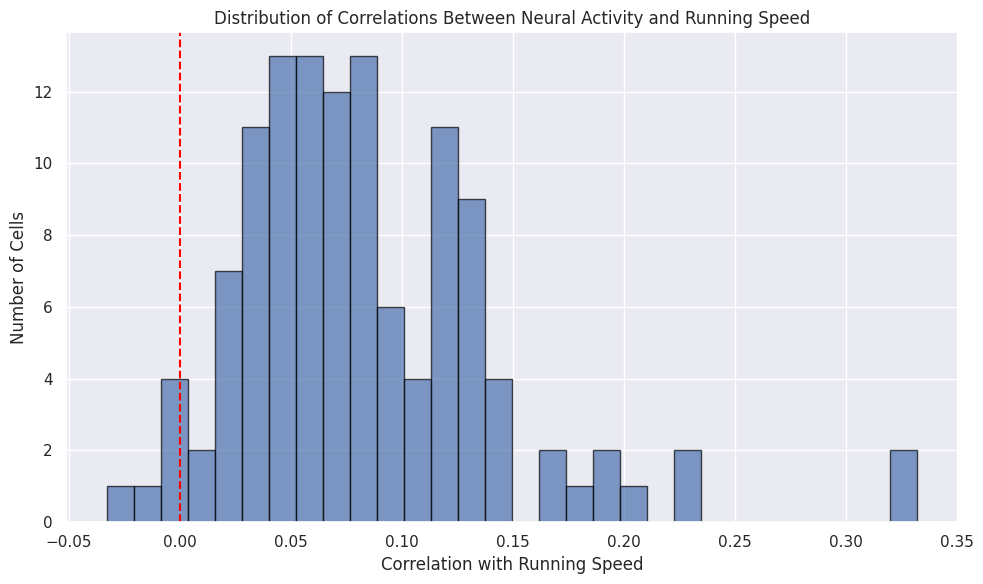

Cells with strongest positive correlations with running:


cell_id  correlation
10       -1     0.332118
83       -1     0.327503
22       -1     0.228199
25       -1     0.222896
39       -1     0.202419


Cells with strongest negative correlations with running:


cell_id  correlation
70       -1     0.000944
8        -1    -0.003126
21       -1    -0.004977
26       -1    -0.015154
56       -1    -0.032888

In [17]:
# Resample running data to match neural data timestamps
from scipy.interpolate import interp1d

# Create interpolation function
run_interp = interp1d(run_timestamps, run_speed, bounds_error=False, fill_value='extrapolate')

# Resample running data to match neural data timestamps
resampled_speed = run_interp(timestamps_array)

# Calculate correlation between running speed and neural activity
correlations = []
cell_ids = []

for i in range(dff_traces.data.shape[1]):
    # Calculate correlation coefficient
    # Convert to numpy array if needed
    activity = dff_traces.data[:, i]
    if not isinstance(activity, np.ndarray):
        activity = activity[:]
    
    corr = np.corrcoef(activity, resampled_speed)[0, 1]
    correlations.append(corr)
    cell_ids.append(roi_df['cell_specimen_id'].iloc[i])

# Create a dataframe for the results
corr_df = pd.DataFrame({
    'cell_id': cell_ids,
    'correlation': correlations
})

# Sort by correlation strength
corr_df = corr_df.sort_values('correlation', ascending=False)

# Plot histogram of correlations
plt.figure(figsize=(10, 6))
plt.hist(correlations, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Correlation with Running Speed')
plt.ylabel('Number of Cells')
plt.title('Distribution of Correlations Between Neural Activity and Running Speed')
plt.tight_layout()
plt.show()

# Find cells with strongest positive and negative correlations
top_positive = corr_df.head(5)
top_negative = corr_df.tail(5)

print("Cells with strongest positive correlations with running:")
display(top_positive)

print("\nCells with strongest negative correlations with running:")
display(top_negative)

Let's visualize the activity of a few cells with strong correlations to running speed:

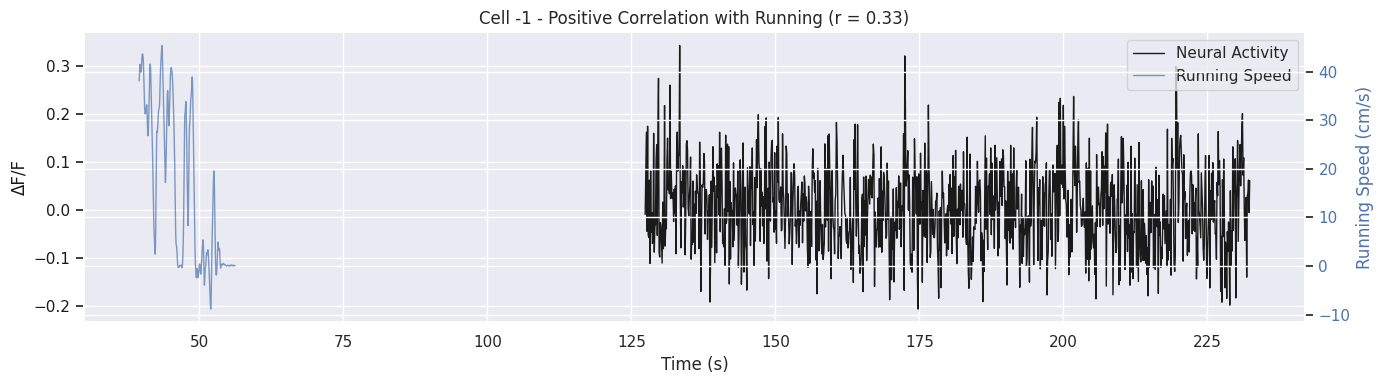

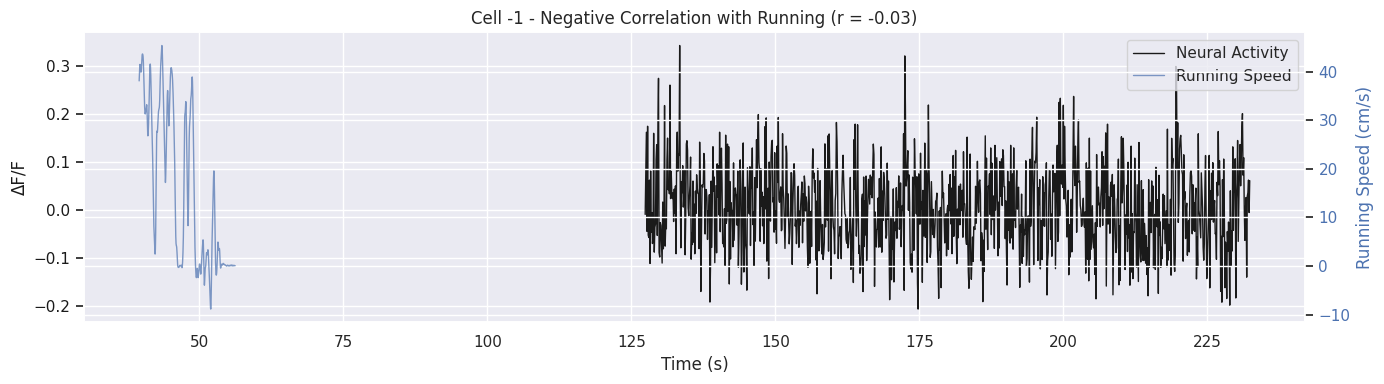

In [18]:
# Plot example cells with strong positive and negative correlations
def plot_activity_with_running(cell_idx, timestamps, dff_data, run_timestamps, run_data, title):
    fig, ax1 = plt.subplots(figsize=(14, 4))
    
    # Neural activity on first y-axis
    ax1.plot(timestamps, dff_data, 'k', lw=1, label='Neural Activity')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('ΔF/F', color='k')
    ax1.tick_params(axis='y', labelcolor='k')
    
    # Running speed on second y-axis
    ax2 = ax1.twinx()
    ax2.plot(run_timestamps, run_data, 'b', lw=1, alpha=0.7, label='Running Speed')
    ax2.set_ylabel('Running Speed (cm/s)', color='b')
    ax2.tick_params(axis='y', labelcolor='b')
    
    plt.title(title)
    
    # Create a combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Plot highest positively correlated cell
pos_idx = np.where(roi_df['cell_specimen_id'] == top_positive['cell_id'].iloc[0])[0][0]
time_slice = slice(1000, 2000)  # Select a representative time window
plot_activity_with_running(
    pos_idx, 
    timestamps[time_slice], 
    dff_traces.data[time_slice, pos_idx], 
    run_timestamps[time_slice], 
    run_speed[time_slice], 
    f"Cell {top_positive['cell_id'].iloc[0]} - Positive Correlation with Running (r = {top_positive['correlation'].iloc[0]:.2f})"
)

# Plot highest negatively correlated cell
neg_idx = np.where(roi_df['cell_specimen_id'] == top_negative['cell_id'].iloc[-1])[0][0]
plot_activity_with_running(
    neg_idx, 
    timestamps[time_slice], 
    dff_traces.data[time_slice, neg_idx], 
    run_timestamps[time_slice], 
    run_speed[time_slice], 
    f"Cell {top_negative['cell_id'].iloc[-1]} - Negative Correlation with Running (r = {top_negative['correlation'].iloc[-1]:.2f})"
)

## Analyzing Spatial Organization of Cells

Let's examine the spatial organization of the recorded cells and see if there's any relationship between their location and their functional properties.

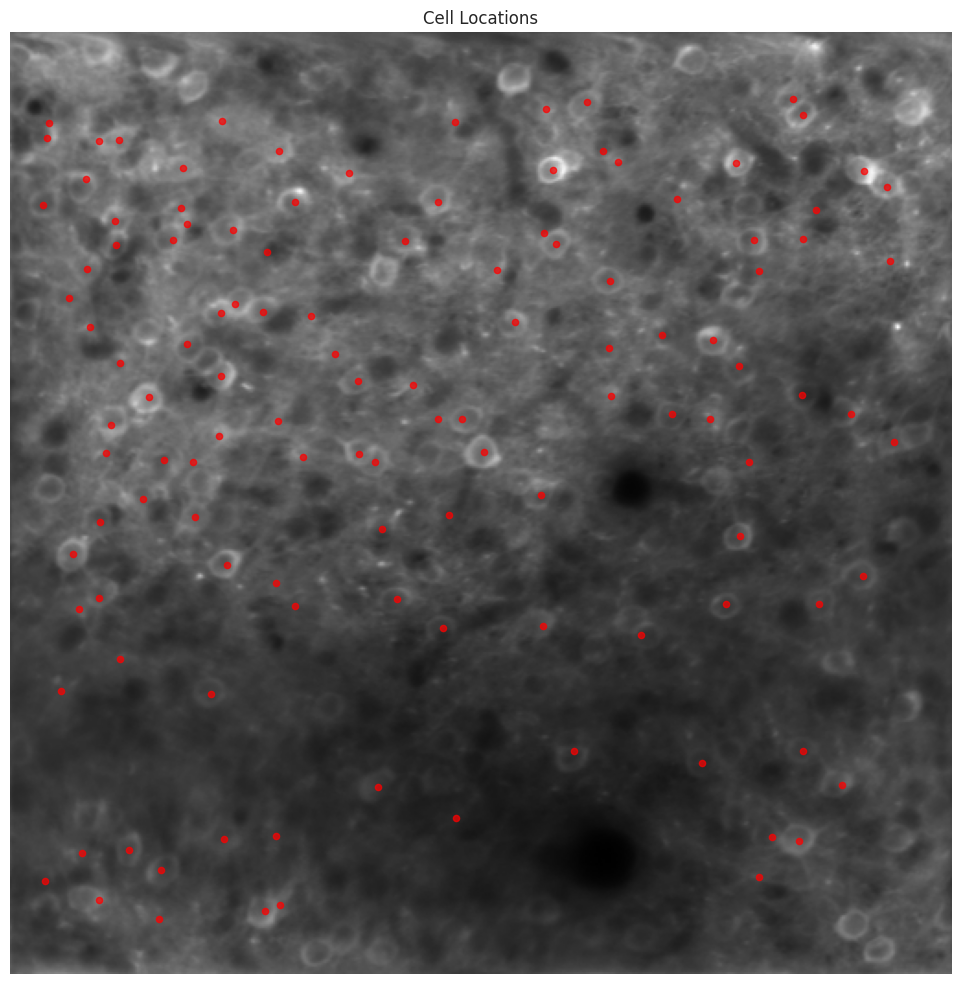

In [19]:
# Get cell coordinates and mask images
x_coords = roi_df['x'].values
y_coords = roi_df['y'].values
widths = roi_df['width'].values
heights = roi_df['height'].values

# Access the segmentation mask for visualization
ophys = nwb.processing["ophys"]
images = ophys.data_interfaces["images"]
avg_image = images.images["average_image"].data[:]

# Create a figure to show spatial locations
plt.figure(figsize=(10, 10))

# Plot average image
plt.imshow(avg_image, cmap='gray')

# Plot cell locations 
plt.scatter(x_coords + widths/2, y_coords + heights/2, s=20, c='red', alpha=0.7)

plt.title('Cell Locations')
plt.axis('off')
plt.tight_layout()
plt.show()

Now, let's color-code cells based on their correlation with running speed:

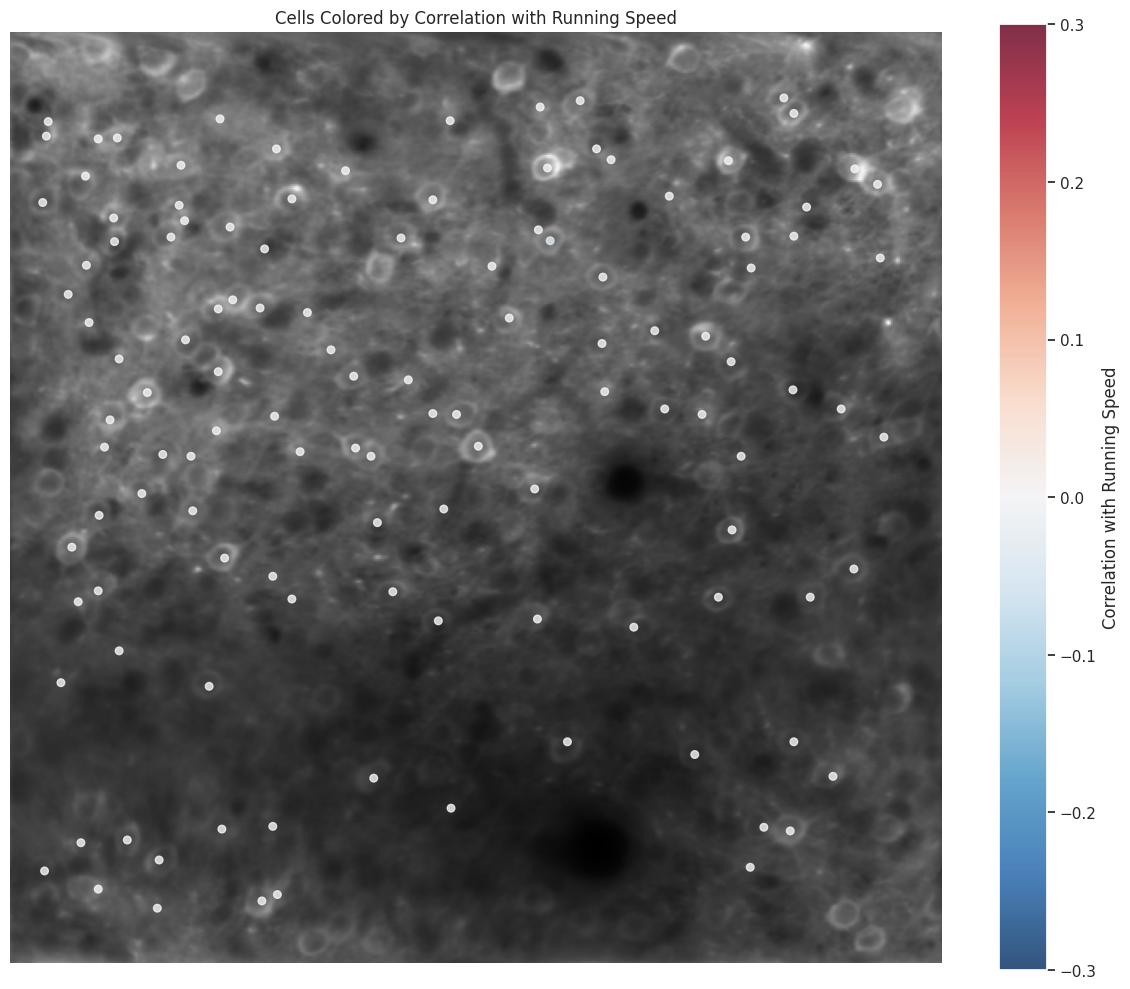

In [20]:
# Match correlations to ROIs
cell_id_to_idx = {cell_id: idx for idx, cell_id in enumerate(roi_df['cell_specimen_id'])}
corr_colors = np.zeros(len(roi_df))

for i, (cell_id, corr) in enumerate(zip(corr_df['cell_id'], corr_df['correlation'])):
    idx = cell_id_to_idx[cell_id]
    corr_colors[idx] = corr

# Create a figure
plt.figure(figsize=(12, 10))

# Plot average image
plt.imshow(avg_image, cmap='gray')

# Create a colormap from blue (negative) to red (positive)
cmap = plt.cm.RdBu_r

# Plot cell locations colored by correlation
scatter = plt.scatter(
    x_coords + widths/2, 
    y_coords + heights/2, 
    s=30, 
    c=corr_colors,
    cmap=cmap, 
    vmin=-0.3, 
    vmax=0.3,
    alpha=0.8
)

plt.colorbar(scatter, label='Correlation with Running Speed')
plt.title('Cells Colored by Correlation with Running Speed')
plt.axis('off')
plt.tight_layout()
plt.show()

## Visualizing Stimulus Selectivity

Let's examine which cells respond preferentially to each type of movie stimulus.

In [21]:
# Function to compute average response amplitude during each stimulus type
def compute_stim_responses(dff_data, timestamps_array, stim_dfs, stim_names):
    responses = np.zeros((dff_data.shape[1], len(stim_dfs)))
    
    for stim_idx, (stim_df, stim_name) in enumerate(zip(stim_dfs, stim_names)):
        # Calculate average response for each stimulus presentation
        all_responses = []
        
        for _, row in stim_df.iterrows():
            # Find time indices during stimulus
            mask = (timestamps_array >= row['start_time']) & (timestamps_array <= row['stop_time'])
            if np.any(mask):
                # Calculate mean response for each cell during this presentation
                presentation_responses = np.mean(dff_data[mask, :], axis=0)
                all_responses.append(presentation_responses)
        
        # Average across all presentations
        if all_responses:
            mean_response = np.mean(all_responses, axis=0)
            responses[:, stim_idx] = mean_response
    
    return responses

# Compute average responses per stimulus
stim_dfs = [gray_df, movie_A_df, movie_B_df, movie_C_df]
stim_names = ['Gray', 'Movie A', 'Movie B', 'Movie C']

responses = compute_stim_responses(dff_traces.data, timestamps_array, stim_dfs, stim_names)

# Create a dataframe with the results
response_df = pd.DataFrame(responses, columns=stim_names)
response_df['cell_id'] = roi_df['cell_specimen_id'].values
response_df['x'] = x_coords + widths/2
response_df['y'] = y_coords + heights/2

Let's visualize the preference of each cell for different stimuli:

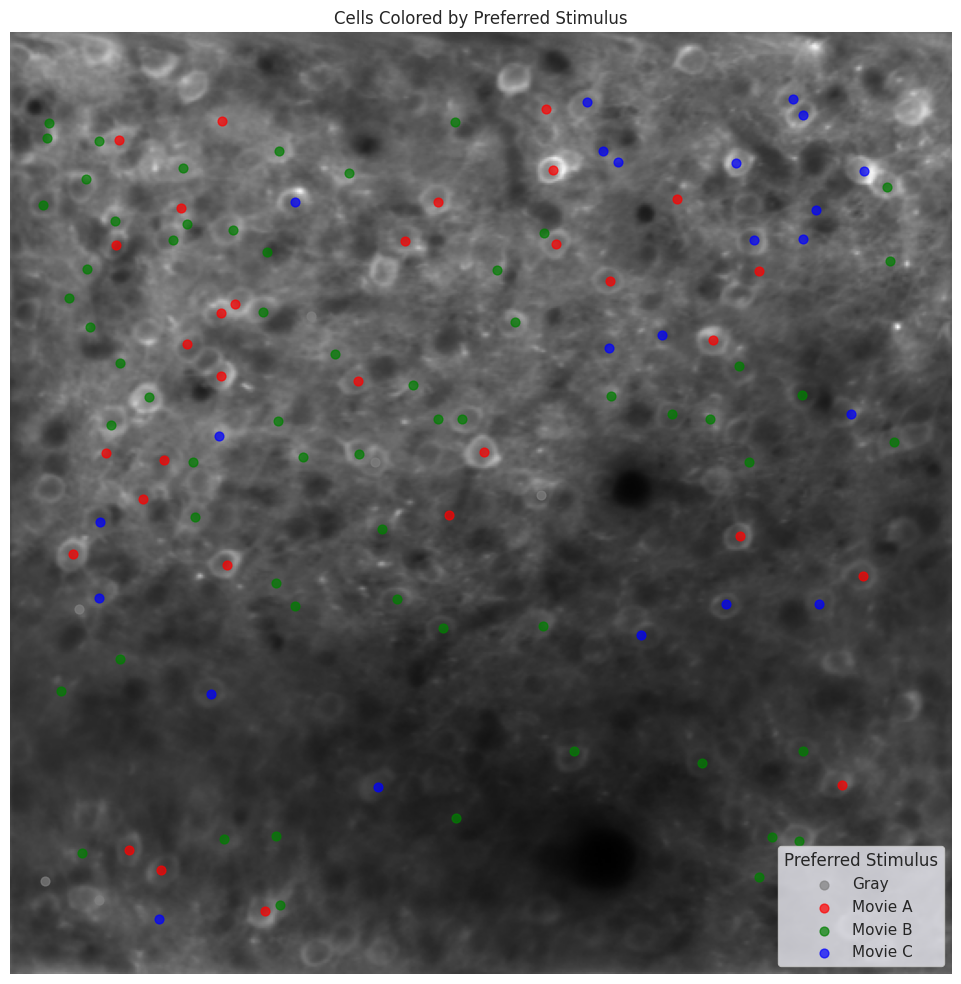

In [22]:
# Calculate preferred stimulus for each cell
response_df['preferred_stimulus'] = response_df[stim_names].idxmax(axis=1)
response_df['response_strength'] = response_df[stim_names].max(axis=1)

# Define colors for each stimulus type
stim_colors = {'Gray': 'gray', 'Movie A': 'red', 'Movie B': 'green', 'Movie C': 'blue'}

# Plot cell locations colored by preferred stimulus
plt.figure(figsize=(12, 10))

# Plot average image
plt.imshow(avg_image, cmap='gray')

# Create a custom colormap
from matplotlib.colors import ListedColormap
stim_cmap = ListedColormap([stim_colors[stim] for stim in stim_names])

# Plot cells
for stim_idx, stim_name in enumerate(stim_names):
    cells = response_df[response_df['preferred_stimulus'] == stim_name]
    plt.scatter(
        cells['x'], 
        cells['y'], 
        s=40, 
        c=stim_colors[stim_name], 
        alpha=0.7, 
        label=stim_name
    )

plt.legend(title='Preferred Stimulus')
plt.title('Cells Colored by Preferred Stimulus')
plt.axis('off')
plt.tight_layout()
plt.show()

Let's look at the distribution of responses to each stimulus type:

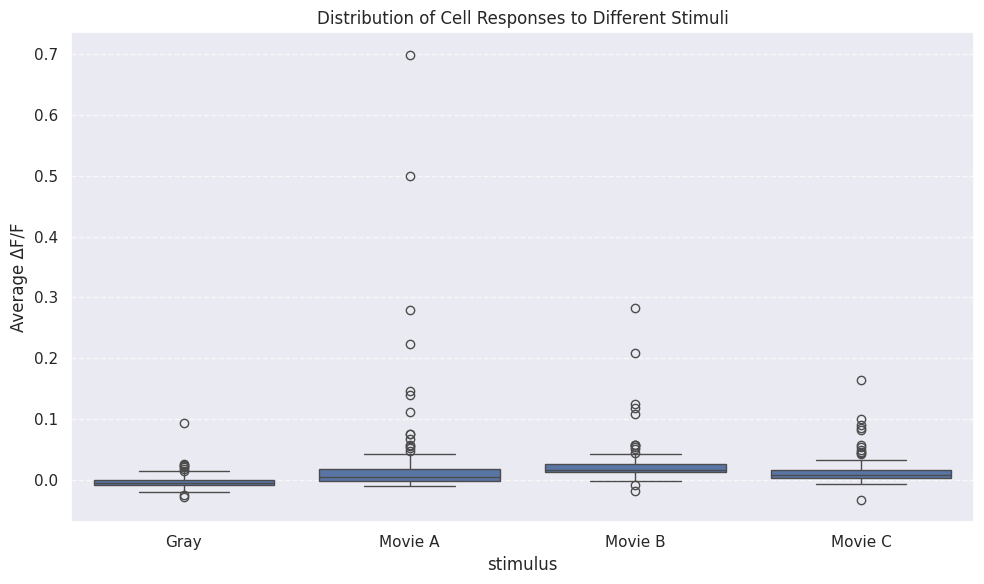

In [23]:
# Reshape data for better plotting
melted_responses = pd.melt(
    response_df[stim_names + ['cell_id']], 
    id_vars=['cell_id'], 
    var_name='stimulus', 
    value_name='response'
)

# Box plot of responses to each stimulus
plt.figure(figsize=(10, 6))
sns.boxplot(x='stimulus', y='response', data=melted_responses)
plt.ylabel('Average ΔF/F')
plt.title('Distribution of Cell Responses to Different Stimuli')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualizing Cell Masks

Let's visualize the segmented cell masks to better understand the spatial extent of the recorded cells.

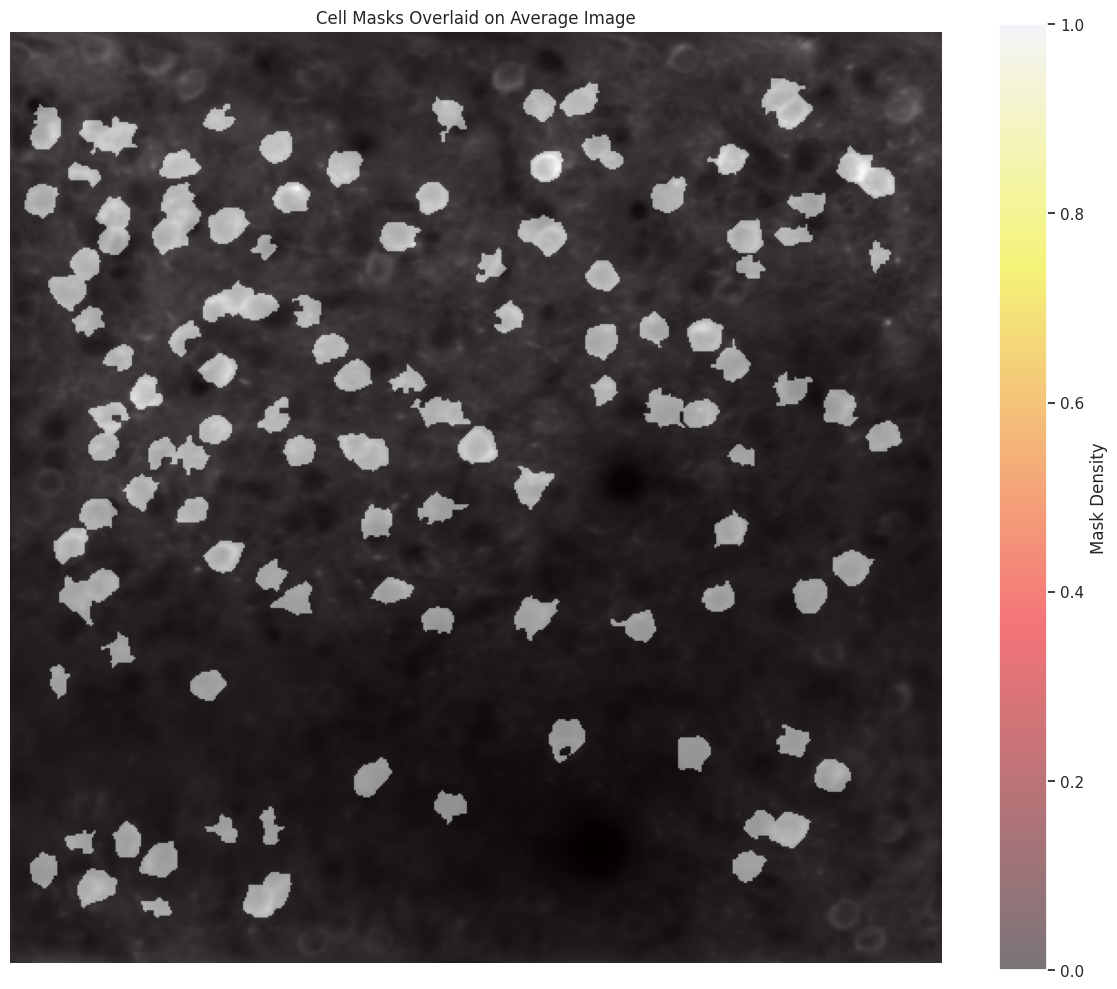

In [24]:
# Get cell masks
masks = []
for i in range(len(roi_df)):
    mask = roi_df['image_mask'].iloc[i]
    masks.append(mask)

# Create a composite mask image
composite_mask = np.zeros_like(avg_image, dtype=float)
for mask in masks:
    # Add the mask to the composite
    composite_mask += mask

# Normalize for visualization
composite_mask = np.clip(composite_mask, 0, 1)

# Plot
plt.figure(figsize=(12, 10))

# Create a blended visualization
plt.imshow(avg_image, cmap='gray')
plt.imshow(composite_mask, alpha=0.5, cmap='hot')
plt.title('Cell Masks Overlaid on Average Image')
plt.axis('off')
plt.colorbar(label='Mask Density')
plt.tight_layout()
plt.show()

## Summary and Conclusions

In this notebook, we've explored the Allen Institute Openscope - Sequence Learning Project dataset (Dandiset 000617), which contains two-photon calcium imaging data from mice viewing sequences of natural movie clips. Here's what we've learned:

1. **Dataset Structure**: The dataset contains NWB files with calcium imaging data, stimulus information, running behavior, and ROI (cell) information.

2. **Neural Responses to Stimuli**: We examined how neurons in the visual cortex respond to different movie stimuli. Some cells show clear preferences for specific movie clips.

3. **Running Behavior**: We analyzed the relationship between neural activity and the mouse's running behavior, finding that some cells are positively correlated with running speed while others show negative correlations.

4. **Spatial Organization**: We visualized the spatial organization of the recorded cells and their functional properties, such as stimulus preference and correlation with running.

## Potential Future Analyses

This dataset offers many possibilities for further exploration:

1. **Sequence Learning**: Analyzing how neural responses change across sessions as mice learn the repeating sequence of stimuli (ABCABC) compared to random presentations.

2. **Predictive Coding**: Investigating whether cells develop predictive responses, where they start firing in anticipation of upcoming stimuli after learning the sequence.

3. **Cell Type Classification**: Categorizing cells based on their response properties, such as stimulus selectivity and temporal dynamics.

4. **Population Analysis**: Examining how information is encoded across populations of neurons rather than just individual cells.

5. **Comparison Across Brain Regions**: Comparing responses across different visual cortical areas (V1, LM, AM, PM) to understand hierarchical processing.

This notebook provides a foundation for exploring this rich dataset and understanding the neural mechanisms underlying sequence learning and predictive processing in the visual cortex.